# Assess Demand for Bikes for BoomBikes
### Problem Statement

* Find out the factors/variables that affect demand for bikes
* Build model that estimate demand for given set of data for identified variables

### Steps for Solution

- Understand Data
- Clean the Data , Feature Selection
- Build Model
- Evaluate model


##      STEP-1: UNDERSTAND DATA
Read the data and understand the meaning of the data elements

In [142]:
## Import the necessary packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Read the dataset into a data frame called bikedata and observe the data
bikedata = pd.read_csv('day.csv')
bikedata.head(20)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        6           0   
1         2  02-01-2018       1   0     1        0        0           0   
2         3  03-01-2018       1   0     1        0        1           1   
3         4  04-01-2018       1   0     1        0        2           1   
4         5  05-01-2018       1   0     1        0        3           1   
5         6  06-01-2018       1   0     1        0        4           1   
6         7  07-01-2018       1   0     1        0        5           1   
7         8  08-01-2018       1   0     1        0        6           0   
8         9  09-01-2018       1   0     1        0        0           0   
9        10  10-01-2018       1   0     1        0        1           1   
10       11  11-01-2018       1   0     1        0        2           1   
11       12  12-01-2018       1   0     1        0        3           1   
12       13  13-01-2018       1   0     1        0        4           1   
13       14  14-01-2018       1   0     1        0        5           1   
14       15  15-01-2018       1   0     1        0        6           0   
15       16  16-01-2018       1   0     1        0        0           0   
16       17  17-01-2018       1   0     1        1        1           0   
17       18  18-01-2018       1   0     1        0        2           1   
18       19  19-01-2018       1   0     1        0        3           1   
19       20  20-01-2018       1   0     1        0        4           1   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   
15           1   9.498347  11.71085  48.3750  12.625011     251         953   
16           2   7.209153   8.83855  53.7500  12.999139     117         883   
17           2   8.883347  11.61665  86.1667   9.833925       9         674   
18           2  11.979134  14.92110  74.1739  13.957239      78        1572   
19           2  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [144]:
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [145]:
# Verify that there are no null values exist for each of the columns
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Data Conversion
As explained in the data dictionary, convert numerical representation for the below columns into categorical values for Exploratory Data Analysis
* WeatherList : Four weather situations
* Seasons :  Four seasons
* Years : Though they are not categorical, transformed into year numbers for inference of data

In [146]:
# Define mapping dictionary for the below columns
weathersit_details = {1: 'Clear',2: 'Mist',3: 'LightSnowRain',4: 'HeavyRain'}
season_details = {1: 'spring',2: 'summer',3: 'fall',4: 'winter'}
year_details = {0: 2018,1: 2019}

# Map numerical to categorical
bikedata['weathersit'] = bikedata['weathersit'].map(weathersit_details)
bikedata['season'] = bikedata['season'].map(season_details)
bikedata['yr'] = bikedata['yr'].map(year_details)

bikedata.head(20)

instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018  spring  2018     1        0        6           0   
1         2  02-01-2018  spring  2018     1        0        0           0   
2         3  03-01-2018  spring  2018     1        0        1           1   
3         4  04-01-2018  spring  2018     1        0        2           1   
4         5  05-01-2018  spring  2018     1        0        3           1   
5         6  06-01-2018  spring  2018     1        0        4           1   
6         7  07-01-2018  spring  2018     1        0        5           1   
7         8  08-01-2018  spring  2018     1        0        6           0   
8         9  09-01-2018  spring  2018     1        0        0           0   
9        10  10-01-2018  spring  2018     1        0        1           1   
10       11  11-01-2018  spring  2018     1        0        2           1   
11       12  12-01-2018  spring  2018     1        0        3           1   
12       13  13-01-2018  spring  2018     1        0        4           1   
13       14  14-01-2018  spring  2018     1        0        5           1   
14       15  15-01-2018  spring  2018     1        0        6           0   
15       16  16-01-2018  spring  2018     1        0        0           0   
16       17  17-01-2018  spring  2018     1        1        1           0   
17       18  18-01-2018  spring  2018     1        0        2           1   
18       19  19-01-2018  spring  2018     1        0        3           1   
19       20  20-01-2018  spring  2018     1        0        4           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0        Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1        Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2       Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3       Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4       Clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5       Clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6        Mist   8.057402  10.44195  49.8696  11.304642     148        1362   
7        Mist   6.765000   8.11270  53.5833  17.875868      68         891   
8       Clear   5.671653   5.80875  43.4167  24.250650      54         768   
9       Clear   6.184153   7.54440  48.2917  14.958889      41        1280   
10       Mist   6.932731   9.57320  68.6364   8.182844      43        1220   
11      Clear   7.081807   8.02365  59.9545  20.410009      25        1137   
12      Clear   6.765000   7.54415  47.0417  20.167000      38        1368   
13      Clear   6.595670   9.42065  53.7826   8.478716      54        1367   
14       Mist   9.566653  12.40560  49.8750  10.583521     222        1026   
15      Clear   9.498347  11.71085  48.3750  12.625011     251         953   
16       Mist   7.209153   8.83855  53.7500  12.999139     117         883   
17       Mist   8.883347  11.61665  86.1667   9.833925       9         674   
18       Mist  11.979134  14.92110  74.1739  13.957239      78        1572   
19       Mist  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [147]:
bikedata.shape

(730, 16)

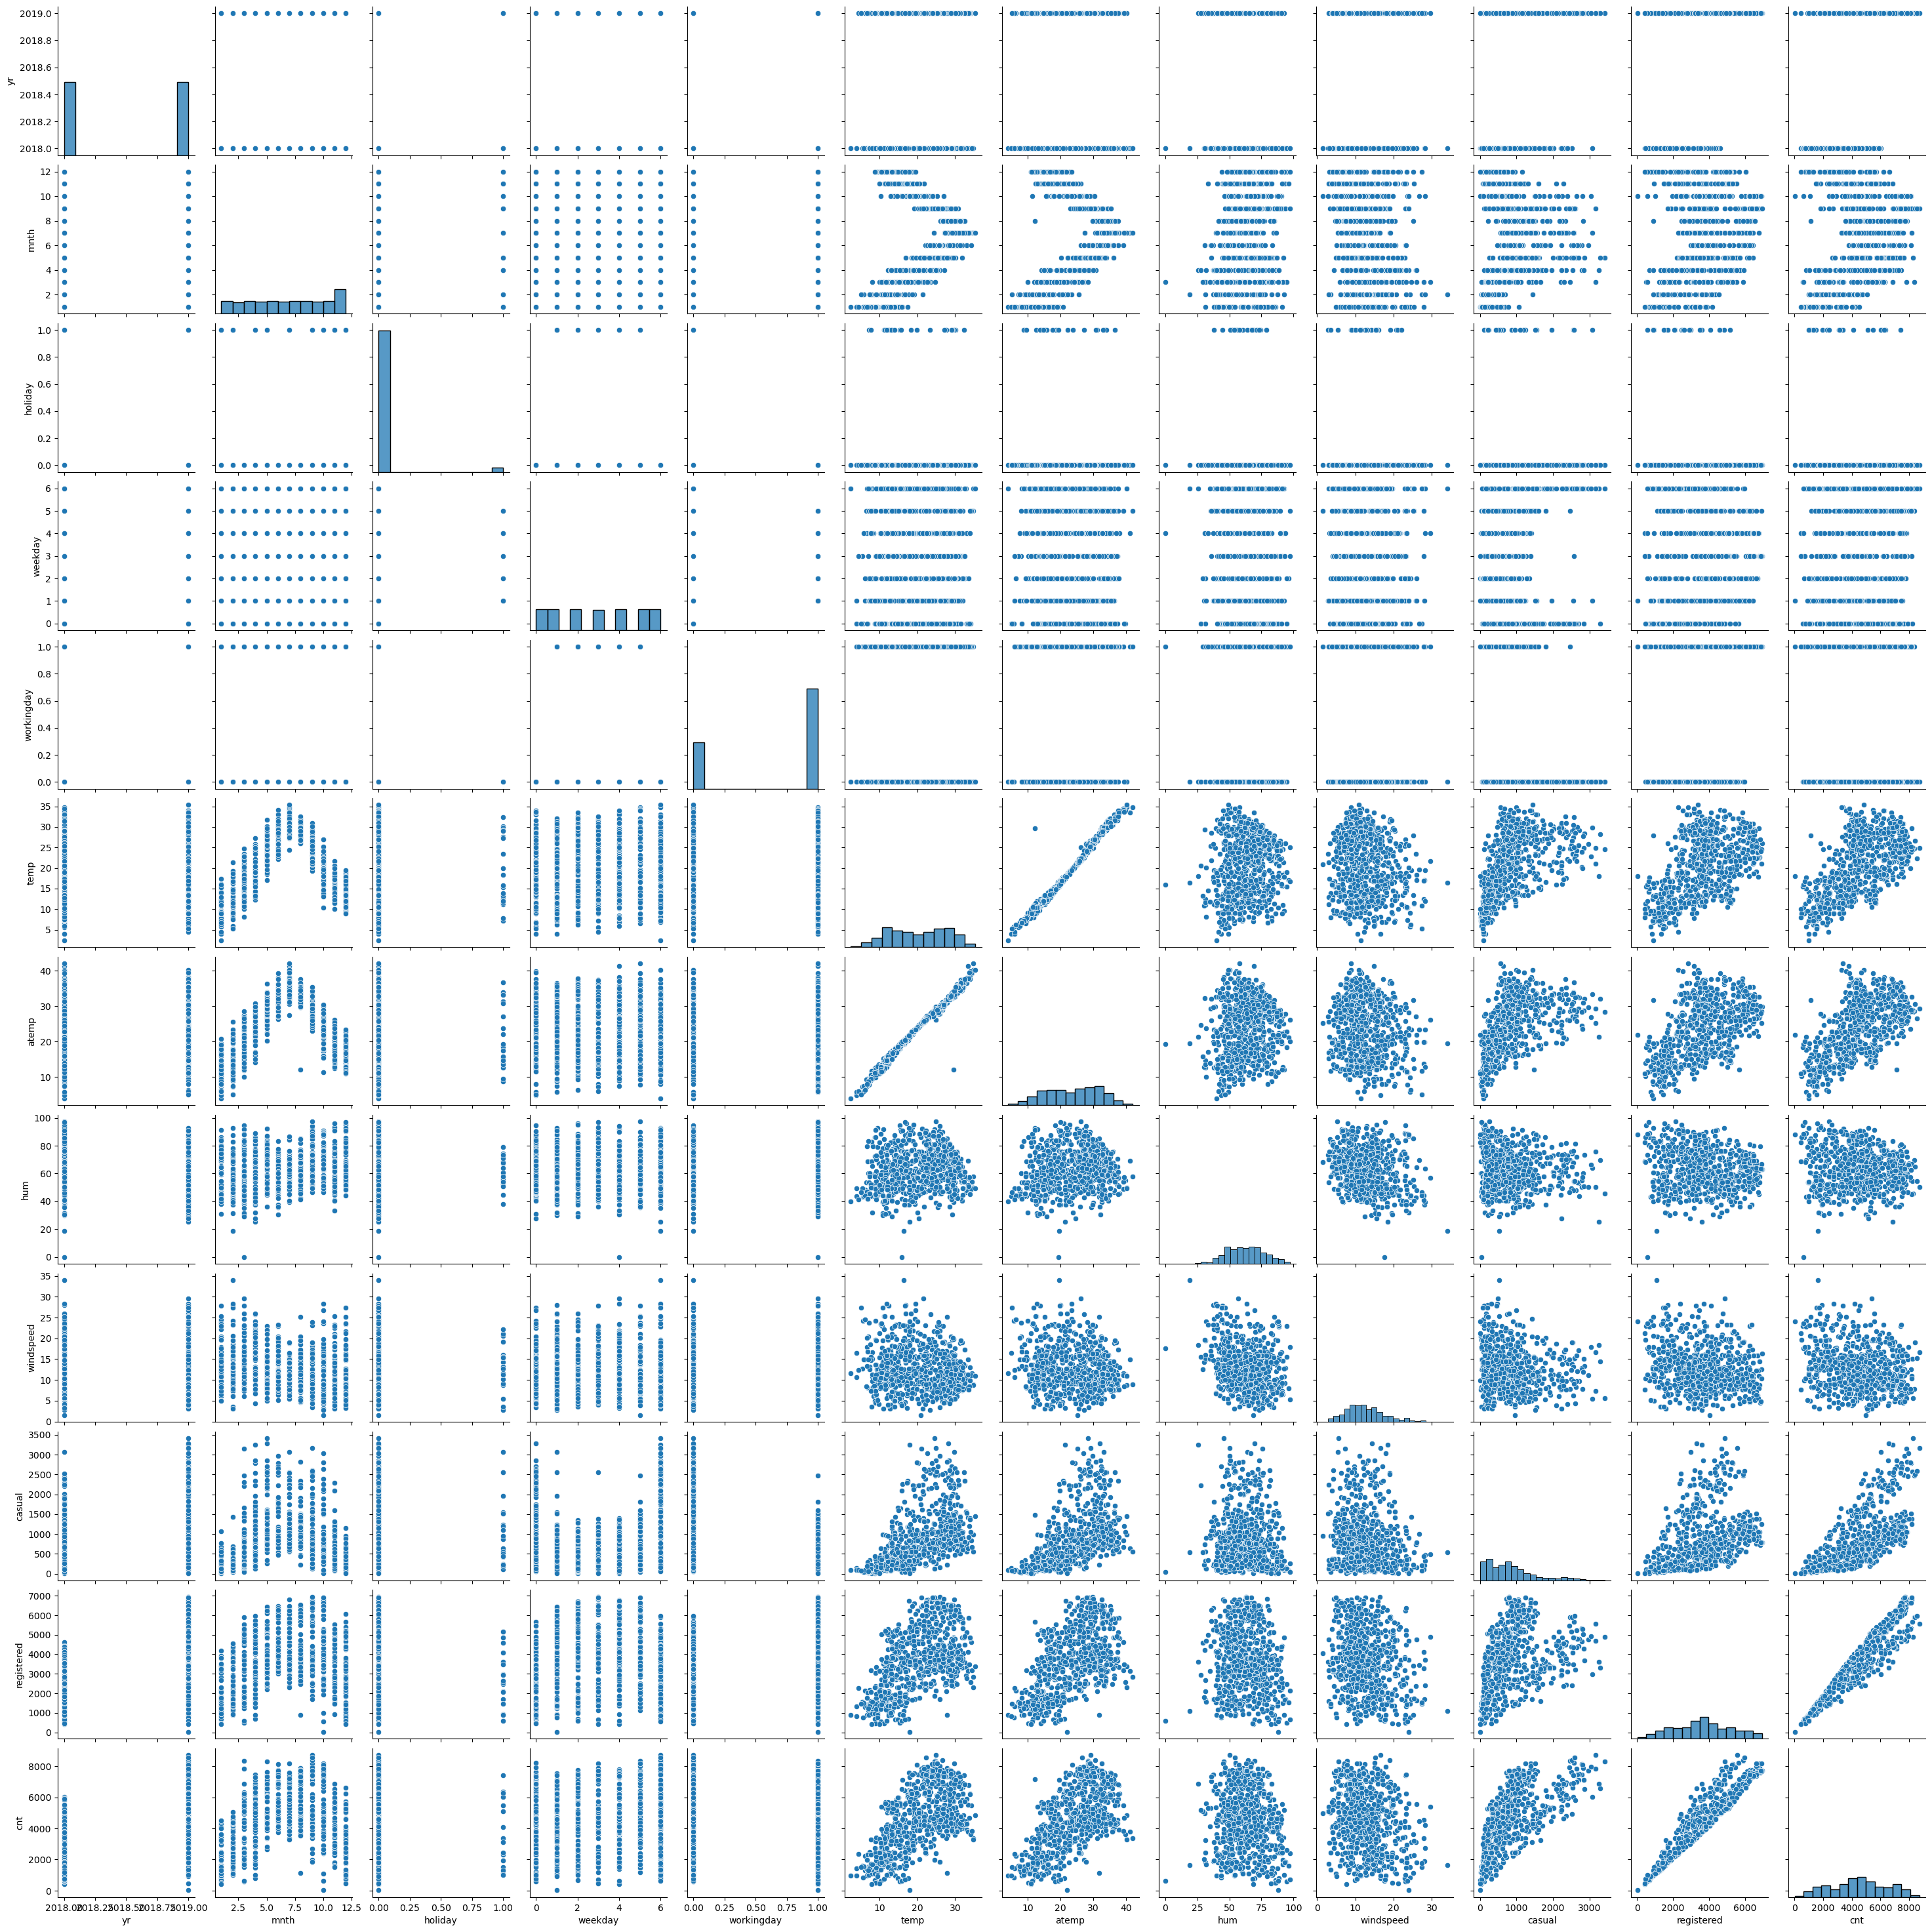

In [148]:
sns.pairplot(data=bikedata, vars=['yr','mnth','holiday','weekday','workingday','temp','atemp','hum', 'windspeed',
       'casual', 'registered', 'cnt'])
plt.show()

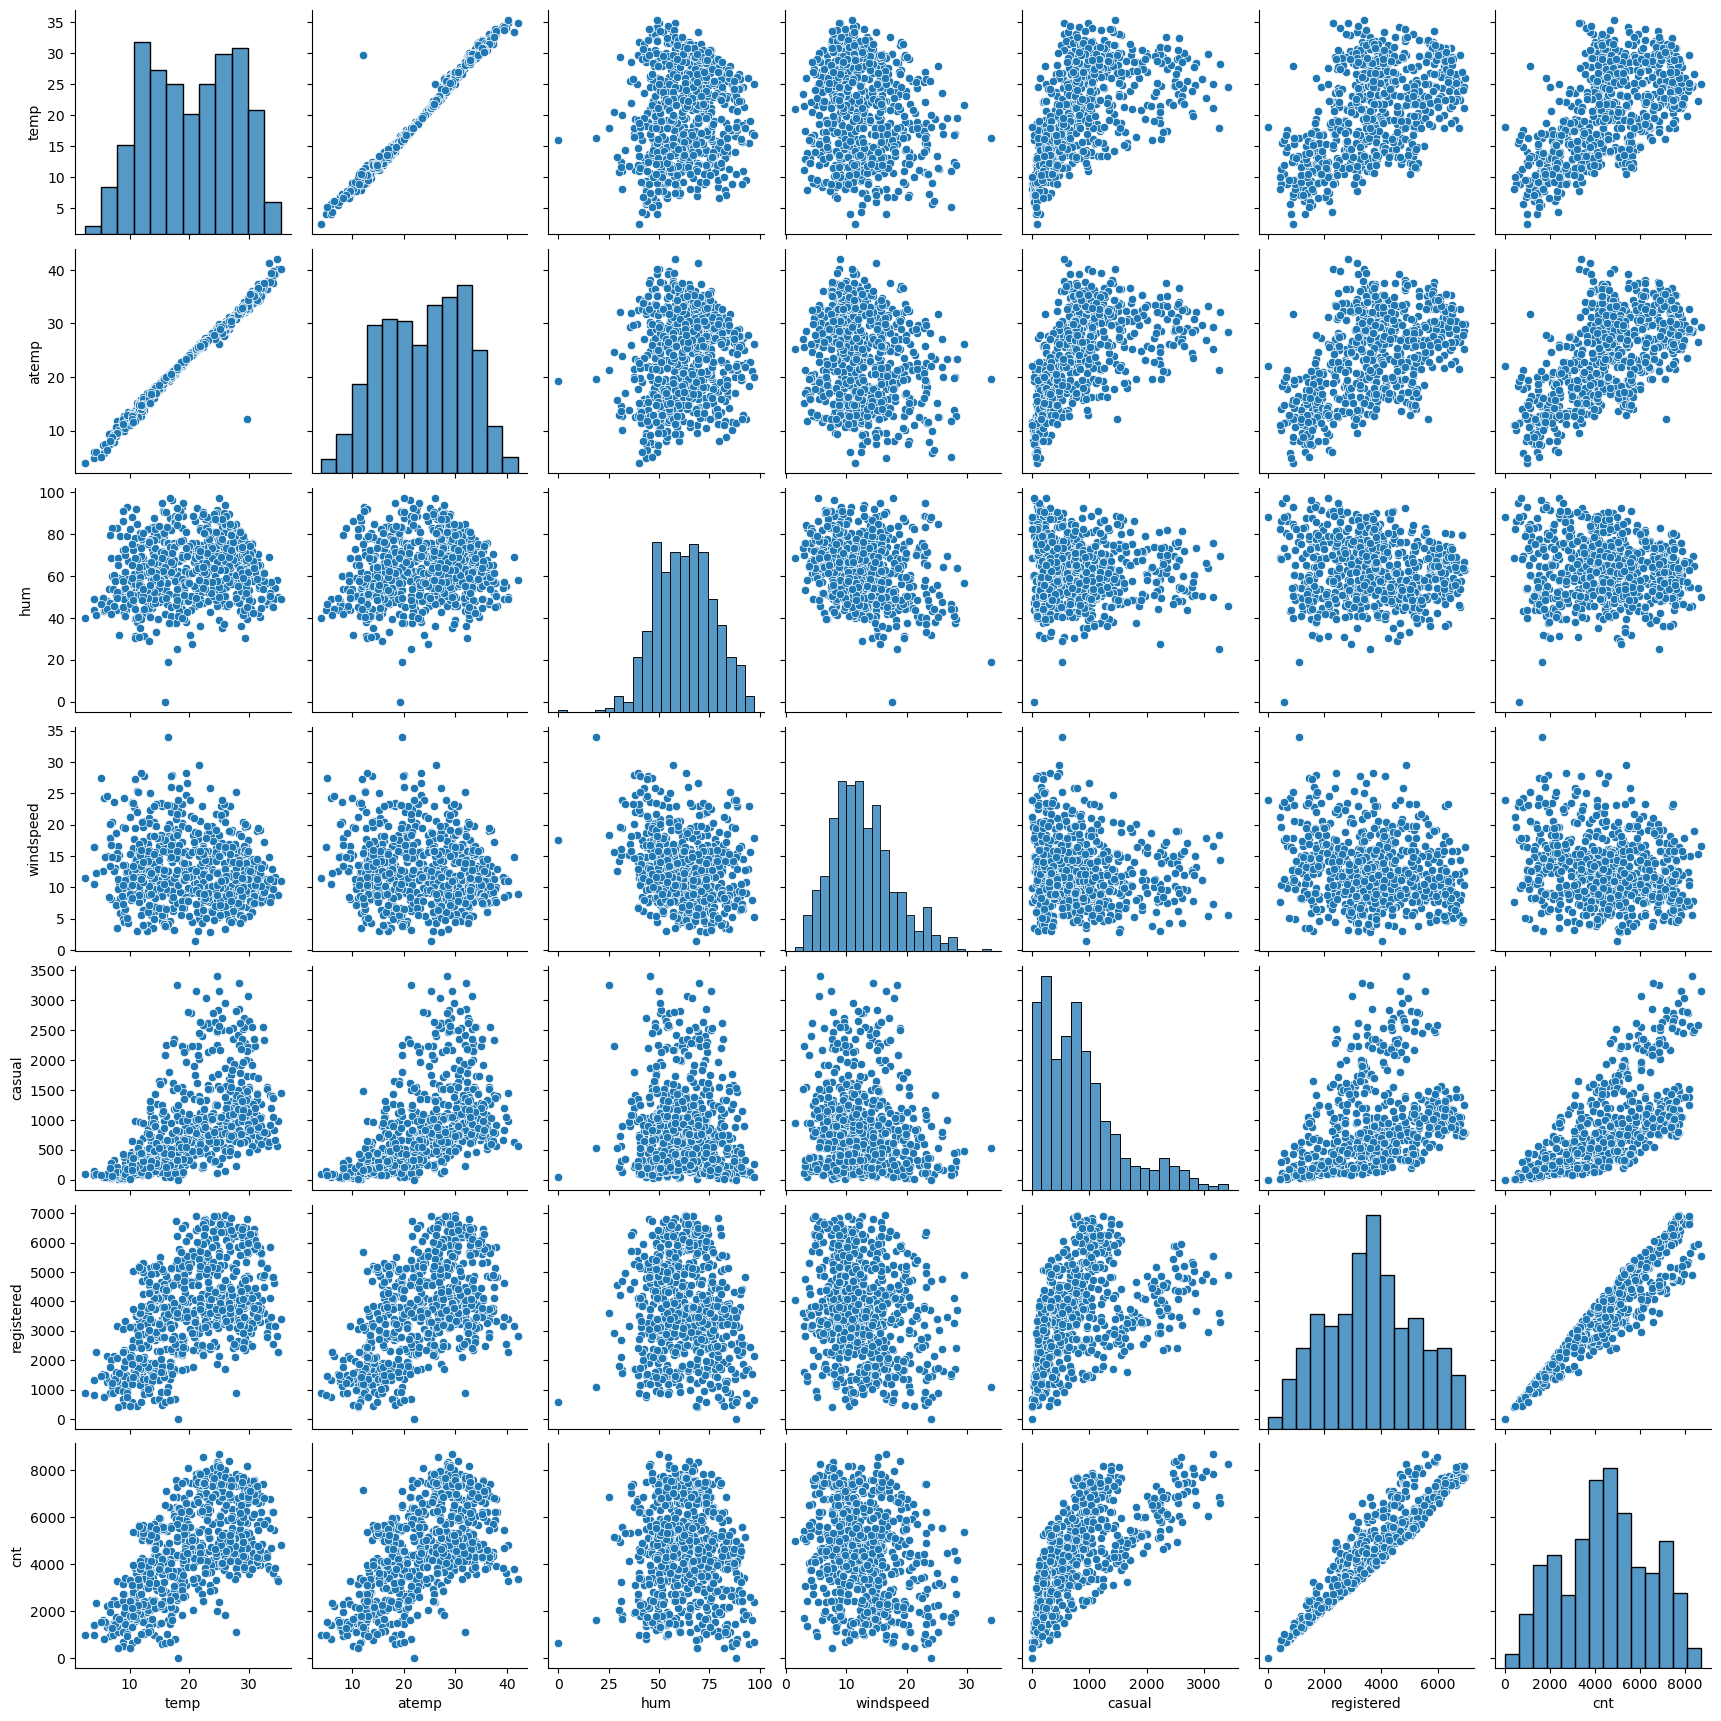

In [149]:
## From the above high level visuals, limited pairplot to few variables appears to have high correlation
sns.pairplot(data=bikedata, vars=['temp','atemp','hum', 'windspeed',
       'casual', 'registered', 'cnt'])
plt.show()

At first, “temp” and “atemp” variables have the highest correlation. <br> 
Then “registered” and “cnt” (target variable) variables are having the second high correlation from the pair plot diagram

##### Scatter plot between count and season, year, month

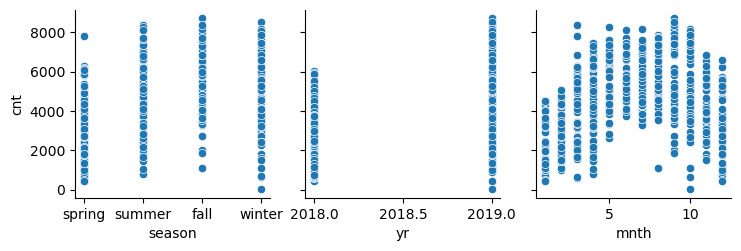

In [150]:
sns.pairplot(data=bikedata, x_vars=['season','yr','mnth'],y_vars=['cnt'], kind='scatter')
plt.show()

##### Scatter plot between count and holiday, working day, weather situation

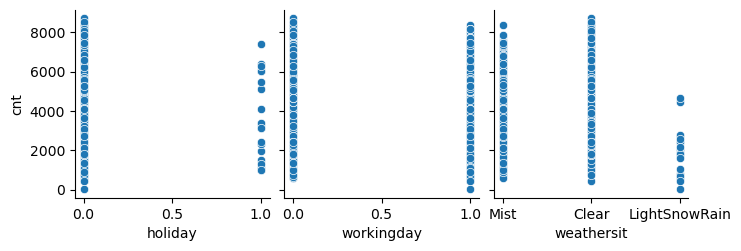

In [151]:
sns.pairplot(data=bikedata, x_vars=['holiday','workingday','weathersit'],y_vars=['cnt'], kind='scatter')
plt.show()

##### Boxplot on Categorical data fields Weathersituation, Count , Season


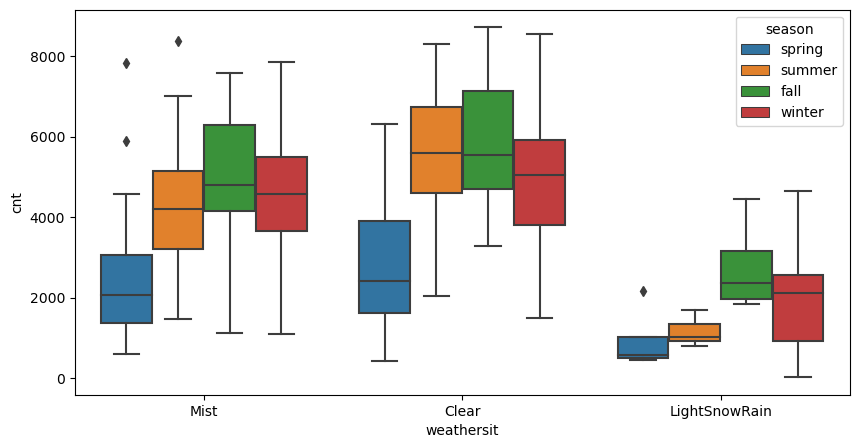

In [152]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = bikedata)
plt.show()

Its evident that the count of Rides is high when the weather is Clear and very low when there is Light Snow / Light Rain. 

##### Boxplot on categorical fields Weather situation and Year, count of rides


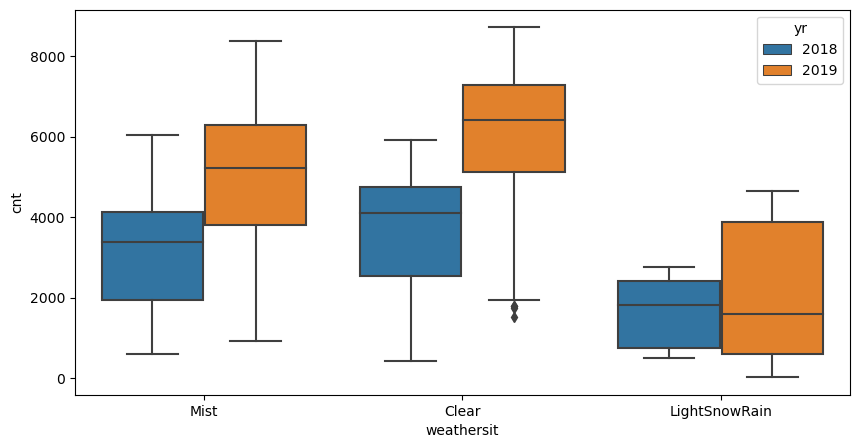

In [153]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bikedata)
plt.show()

It is evident that the number of rides are increased year on year

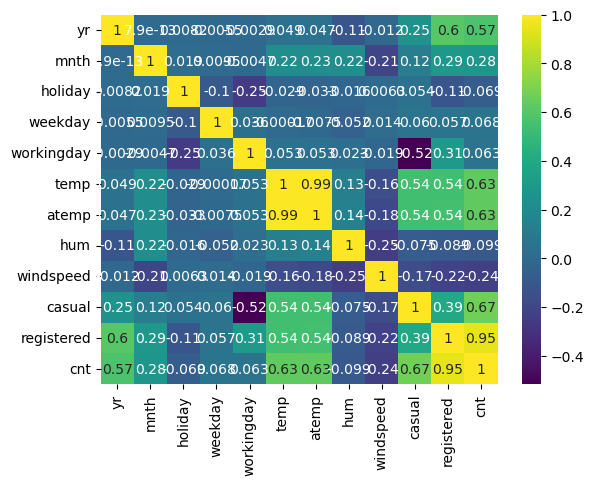

In [154]:
bikeheat = bikedata[[ 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
sns.heatmap(bikeheat.corr(), annot=True, cmap='viridis')
plt.show()

## STEP-2: CLEAN THE DATA
Covert the data into numerical values. And add necessary dummy variables

#### Convert "Season" Categorical values into Dummy Variables

In [155]:
# Check unique values of Season
bikedata['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [156]:
#Convert 4 categorical values into 3 dummy variables for Season
seasonnum = pd.get_dummies(bikedata['season'], dtype=int, drop_first=True)
seasonnum.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

#### Convert "WeatherSit" categorical values into Dummy variables

In [157]:
# Check unique values of Season
bikedata['weathersit'].unique()
# Its observed that there is "Heavy Rain" categorical value though the data dictionary talks about it.

array(['Mist', 'Clear', 'LightSnowRain'], dtype=object)

In [158]:
#Convert 3 categorical values into 2 dummy variables for Weathersit
weathernum = pd.get_dummies(bikedata['weathersit'], dtype=int, drop_first=True)
weathernum.head()

LightSnowRain  Mist
0              0     1
1              0     1
2              0     0
3              0     0
4              0     0

In [159]:
# Append new dummy variables to the Dataset
bikedata = pd.concat([bikedata, seasonnum,weathernum], axis = 1)

# Drop the Categorical equivalent columns as Dummy variables are created for them
bikedata.drop(['season','weathersit'], inplace=True, axis = 1)

In [160]:
# Drop instant id column as it is just a record identifier. 
# Drop dteday date column as month and year and weekday columns already represent the same semantics
bikedata.drop(['instant','dteday'],inplace=True, axis=1)

In [161]:
bikedata.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0  2018     1        0        6           0  14.110847  18.18125  80.5833   
1  2018     1        0        0           0  14.902598  17.68695  69.6087   
2  2018     1        0        1           1   8.050924   9.47025  43.7273   
3  2018     1        0        2           1   8.200000  10.60610  59.0435   
4  2018     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  spring  summer  winter  LightSnowRain  \
0  10.749882     331         654   985       1       0       0              0   
1  16.652113     131         670   801       1       0       0              0   
2  16.636703     120        1229  1349       1       0       0              0   
3  10.739832     108        1454  1562       1       0       0              0   
4  12.522300      82        1518  1600       1       0       0              0   

   Mist  
0     1  
1     1  
2     0  
3     0  
4     0

## STEP-3: BUILD MODEL

- First Split the data into 70% Train data and 30% Test data
- Scale the train data
- Train the model

In [162]:
# Split the data into 70% and 30% for traindata and testdata
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikedata, train_size = 0.7, test_size = 0.3, random_state = 100)

Selected as MinMaxScaler as all the data is scaled semantically w.r.t original data in the range of 0 and 1

In [163]:
# Get the object of MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [164]:
# Apply scaler() to all the native numeric data except the 'yes-no' and 'dummy' variables
num_vars = [ 'yr', 'mnth', 'weekday','workingday','temp','atemp','hum','windspeed','casual','registered','holiday','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [165]:
# After data the scaled
df_train.head()

yr      mnth  holiday   weekday  workingday      temp     atemp  \
653  1.0  0.818182      0.0  0.333333         1.0  0.509887  0.501133   
576  1.0  0.545455      0.0  0.333333         1.0  0.815169  0.766351   
426  1.0  0.181818      0.0  1.000000         0.0  0.442393  0.438975   
728  1.0  1.000000      0.0  0.000000         0.0  0.245101  0.200348   
482  1.0  0.272727      0.0  1.000000         0.0  0.395666  0.391735   

          hum  windspeed    casual  registered       cnt  spring  summer  \
653  0.575354   0.300794  0.280402    0.951776  0.864243       0       0   
576  0.725633   0.264686  0.294422    0.899220  0.827658       0       0   
426  0.640189   0.255342  0.290765    0.446145  0.465255       1       0   
728  0.498067   0.663106  0.110332    0.203869  0.204096       1       0   
482  0.504508   0.188475  0.340750    0.444701  0.482973       0       1   

     winter  LightSnowRain  Mist  
653       1              0     0  
576       0              0     0  
426       0              0     1  
728       0              0     0  
482       0              0     1

In [166]:
df_train.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.504456    0.025490    0.498366    0.676471    0.537262   
std      0.500429    0.315338    0.157763    0.336182    0.468282    0.225844   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.181818    0.000000    0.166667    0.000000    0.339853   
50%      1.000000    0.545455    0.000000    0.500000    1.000000    0.540519   
75%      1.000000    0.818182    0.000000    0.833333    1.000000    0.735215   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            atemp         hum   windspeed      casual  registered         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.512989    0.650369    0.320768    0.254661    0.523944    0.513620   
std      0.212385    0.145882    0.169797    0.206011    0.228175    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.332086    0.538643    0.199179    0.094179    0.353487    0.356420   
50%      0.526811    0.653714    0.296763    0.212740    0.525123    0.518638   
75%      0.688457    0.754830    0.414447    0.327415    0.696073    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer     winter  LightSnowRain        Mist  
count  510.000000  510.000000  510.00000     510.000000  510.000000  
mean     0.243137    0.245098    0.24902       0.029412    0.343137  
std      0.429398    0.430568    0.43287       0.169124    0.475223  
min      0.000000    0.000000    0.00000       0.000000    0.000000  
25%      0.000000    0.000000    0.00000       0.000000    0.000000  
50%      0.000000    0.000000    0.00000       0.000000    0.000000  
75%      0.000000    0.000000    0.00000       0.000000    1.000000  
max      1.000000    1.000000    1.00000       1.000000    1.000000

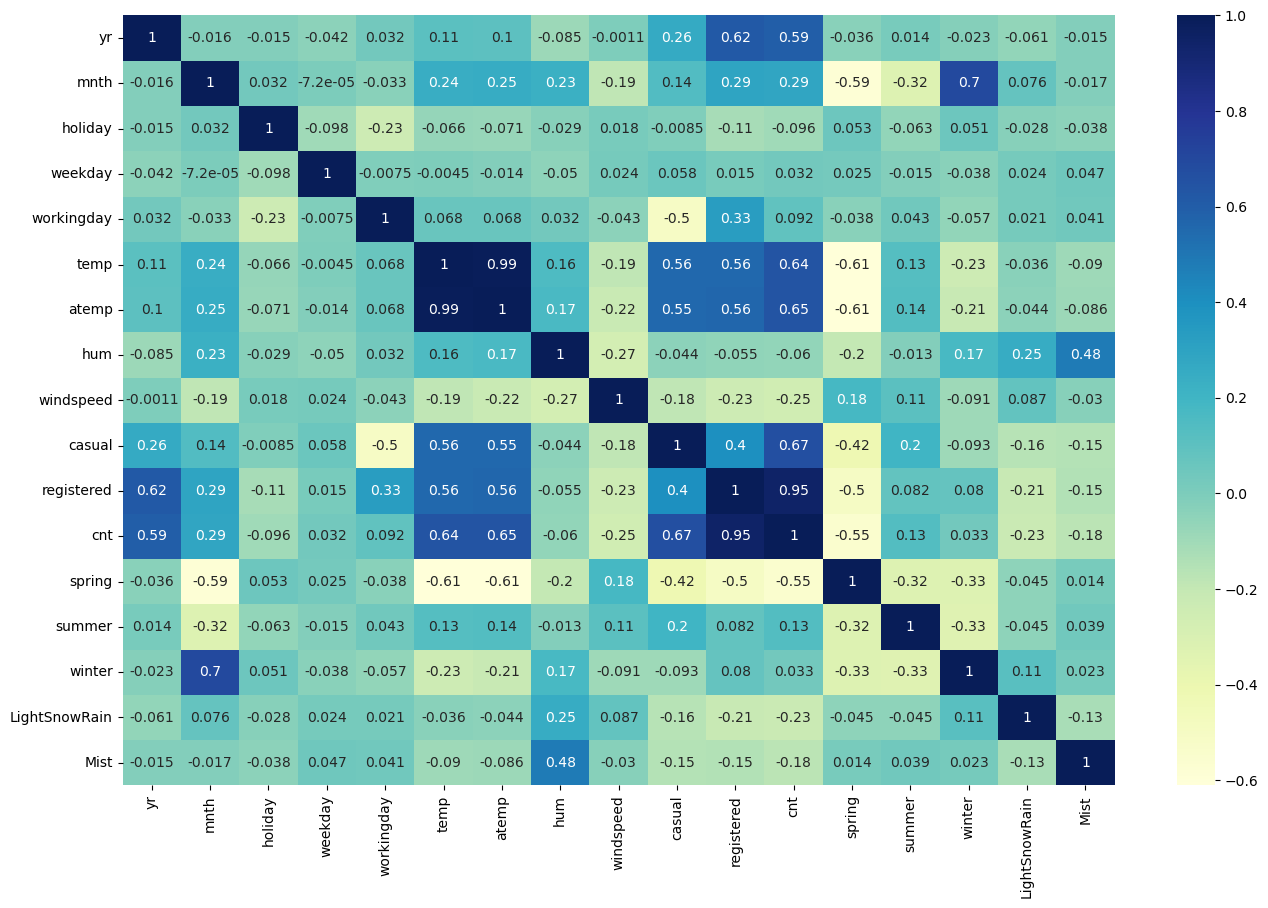

In [167]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations from Correlation Matrix
- temp and atemp are also highly correlated as they represent the same meaning
- Its clearly visible that  "Count" and "Registered" are highly correlated as they represent the number of rides
- Similarly,  "Count" and "Casual" are highly correlated as they represent the number of rides

In [168]:
#Separate Target variable (y_train) and feature variables (X_train)

import statsmodels.api as sm
y_train = df_train.pop('cnt')
X_train = df_train


In [169]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5            temp  393.12
6           atemp  367.25
10     registered   42.84
7             hum   30.26
1            mnth   12.73
4      workingday   10.49
9          casual    9.82
0              yr    6.02
8       windspeed    5.23
13         winter    5.06
11         spring    4.59
3         weekday    3.34
12         summer    3.04
15           Mist    2.52
14  LightSnowRain    1.53
2         holiday    1.13

The VIF and Correlation matrix results are matching. Hence dropping high VIF variables.
- Dropping "atemp" only as drop of this may affect the VIF in the subsequent runs

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train.drop(['atemp'],axis=1,inplace=True)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9      registered  42.78
5            temp  31.21
6             hum  30.20
1            mnth  12.73
4      workingday  10.47
8          casual   9.81
0              yr   6.01
7       windspeed   5.02
12         winter   4.93
10         spring   4.51
3         weekday   3.33
11         summer   2.94
14           Mist   2.52
13  LightSnowRain   1.52
2         holiday   1.13

In [172]:
# Dropping "registered" as "cnt" being target value represents the same correlation
X_train.drop(['registered'],axis=1,inplace=True)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6             hum  30.19
5            temp  26.40
1            mnth  12.55
8          casual   8.84
4      workingday   6.42
7       windspeed   4.91
11         winter   4.62
9          spring   4.50
3         weekday   3.26
10         summer   2.91
0              yr   2.42
13           Mist   2.38
12  LightSnowRain   1.31
2         holiday   1.13

In [173]:
# "temp" and "hum" are being dropped now
X_train.drop(['temp','hum'],axis=1,inplace=True)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1            mnth  9.29
5       windspeed  4.49
6          casual  4.30
4      workingday  3.77
3         weekday  3.26
9          winter  2.99
0              yr  2.39
7          spring  2.30
8          summer  2.23
11           Mist  1.57
10  LightSnowRain  1.11
2         holiday  1.10

#### Fit / Build the AI model using Statsmodel

In [174]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.180962
yr               0.181524
mnth             0.036929
holiday          0.015287
weekday          0.021538
workingday       0.187590
windspeed       -0.069851
casual           0.669236
spring          -0.132411
summer          -0.036695
winter          -0.003351
LightSnowRain   -0.185180
Mist            -0.048767
dtype: float64

In [175]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     350.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.15e-233
Time:                        09:54:33   Log-Likelihood:                 611.78
No. Observations:                 510   AIC:                            -1198.
Df Residuals:                     497   BIC:                            -1143.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1810      0.023      8.027

In [176]:
# Dropping "holiday" and "winter" as they are having high p-value, which are not significant parameters

X_train.drop(['holiday','winter'],axis=1,inplace=True)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1           mnth  5.11
4      windspeed  4.48
5         casual  3.81
3     workingday  3.40
2        weekday  3.25
0             yr  2.36
6         spring  2.24
7         summer  2.20
9           Mist  1.57
8  LightSnowRain  1.10

#### Re-building the model with feature variables

In [177]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.183066
yr               0.181525
mnth             0.034258
weekday          0.021031
workingday       0.186440
windspeed       -0.070077
casual           0.668897
spring          -0.132177
summer          -0.036415
LightSnowRain   -0.186190
Mist            -0.049082
dtype: float64

In [178]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     422.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.66e-236
Time:                        09:54:33   Log-Likelihood:                 611.48
No. Observations:                 510   AIC:                            -1201.
Df Residuals:                     499   BIC:                            -1154.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1831      0.022      8.286

### Perform Residual Analysis

Text(0.5, 0, 'Errors')

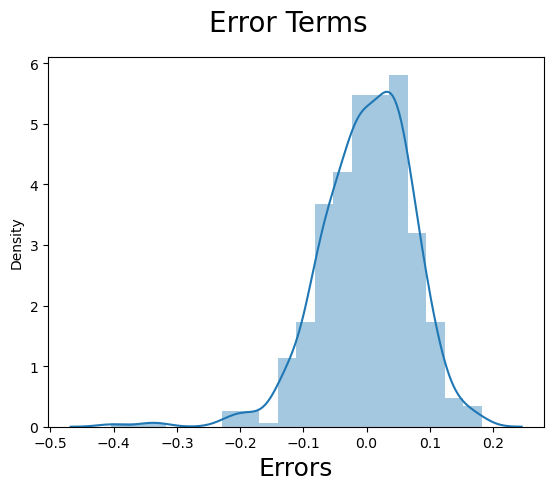

In [179]:
y_train_price = lr_1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### The Error terms are normally distributed. That means most of the data has errors centered around 0. This indicates the model covers 95% of the variance

## STEP-4: EVALUATE MODEL

In [180]:
# Scale the Test data using the same model , used to scale train data
df_test1 = df_test
num_vars = [ 'yr', 'mnth', 'weekday','workingday','temp','atemp','hum','windspeed','casual','registered','holiday','cnt']

df_test1[num_vars] = scaler.transform(df_test[num_vars])

In [181]:
#Separate Target variable and Test Data (feature variables)
y_test = df_test1.pop('cnt')
X_test = df_test1


In [182]:
X_test_m1 = sm.add_constant(X_test)
X_test_m1 = X_test_m1.drop(["registered", "temp", "atemp","hum","holiday","winter"], axis = 1)
X_test_m1.head()

const   yr      mnth   weekday  workingday  windspeed    casual  spring  \
184    1.0  0.0  0.545455  0.166667         0.0   0.084219  0.933557       0   
535    1.0  1.0  0.454545  0.500000         1.0   0.153728  0.265163       0   
299    1.0  0.0  0.818182  0.666667         1.0   0.334206  0.072539       0   
221    1.0  0.0  0.636364  0.500000         1.0   0.339570  0.268820       0   
152    1.0  0.0  0.454545  0.666667         1.0   0.537414  0.223712       0   

     summer  LightSnowRain  Mist  
184       0              0     1  
535       1              0     0  
299       0              0     1  
221       0              0     0  
152       1              0     0

In [183]:
## Predict the target variable on the Test data
y_pred_m1 = lr_1.predict(X_test_m1)

Text(0, 0.5, 'y_pred')

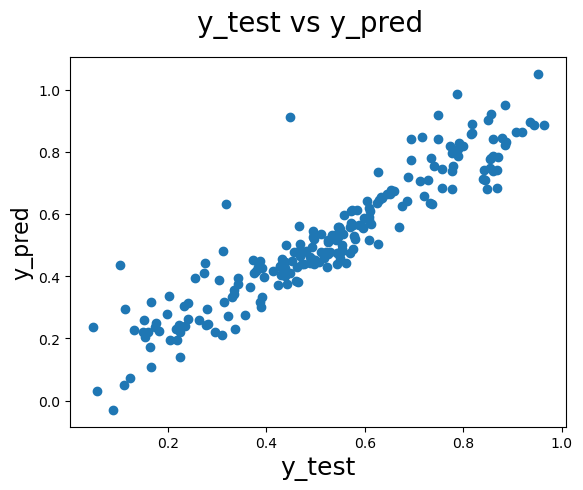

In [184]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Calculate R2 Score between Predicted values  of the Model vs Actual Target values of Test Data

In [185]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m1)

0.8618588323880375

In [186]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_m1))

0.08100078020953815

##### Scatter Plot between Predicted Values and Residuals to check Homoscedasticity  

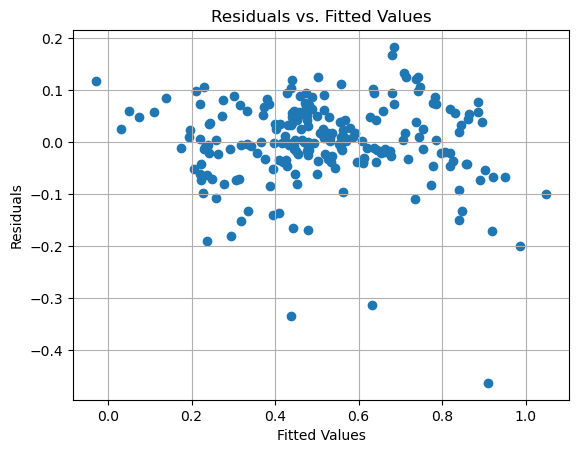

In [189]:
residuals = y_test - y_pred_m1
plt.scatter(y_pred_m1, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()